# Bayesian Linear Regression Tutorial

## Import code

In [1]:
from LR import *

from scipy.stats import linregress
import matplotlib.pyplot as plt 

# update plot parameters
params = {'legend.fontsize': 12,
          'figure.figsize': (12, 9),
          'lines.linewidth':4,
         'axes.labelsize': 20,
         'axes.titlesize':24,
          'axes.linewidth':4,
         'xtick.labelsize':22,
         'ytick.labelsize':22}
plt.rcParams.update(params)
plt.rcParams['pdf.fonttype'] = 42

## Model definition

Want to predict a single output $y \in \mathbb{R}$ given a vector of features $\mathbf{x} \in \mathbb{R}^d$ 

By defining a basis function $\phi: \mathbb{R}^d \rightarrow \mathbb{R}^m$, the model predicts $y$ as a linear combination of potentially non-linear functions of $\mathbf{x}$, weighted by regression coefficients $\mathbf{w} \in \mathbb{R}^m$.  

$$
y = \mathbf{w}^T \phi (\mathbf{x}) + \varepsilon
$$

The model assumes that measurements are corrupted by zero-mean Gaussian noise with precision $\beta$, 


$$
\varepsilon \sim \mathcal{N}(\varepsilon | 0, \beta^{-1})
$$

## Example with $\phi_i(\mathbf{x}) = x_i$

In this example, Scikit-learn's make_regression() is used to generate synthetic data with 100 features, 1 target variable, and 150 samples. Gaussian noise is added to the output variable with a standard deviation of 10, which corresponds to a precision of $\frac{1}{10^{2}}$ = .01.  

In [2]:
import sklearn.datasets
import numpy as np

# number of samples
NS = 150
# number of features
NF = 100 
# define precision as beta
noise = 20        # std deviation 
beta = 1/noise**2 # inverse variance 

X, y = sklearn.datasets.make_regression(n_samples=NS, n_features=NF, n_targets=1, noise=noise)

Decompose data set into training and testing data, setting aside 1/5 of the data for testing. 

In [3]:
N_train = int(.8*NS)

X_train = X[:N_train, :] 
X_test = X[N_train:, :]
Y_train = y[:N_train]
Y_test = y[N_train:]

Fit a Bayesian linear regression model and maximize evidence function

In [4]:
blr = BLR(X_train, Y_train, alpha=0.)
blr.fit()

Evidence: -689.031
Evidence: -480.495
Evidence: -460.338
Evidence: -452.275
Evidence: -448.308
Evidence: -446.044
Evidence: -444.612
Evidence: -443.623
Evidence: -442.892
Evidence: -442.342
Evidence: -441.930


Make Predictions on test data 

In [5]:
Y, Y_stdv = blr.predict(X_test)

Plot results

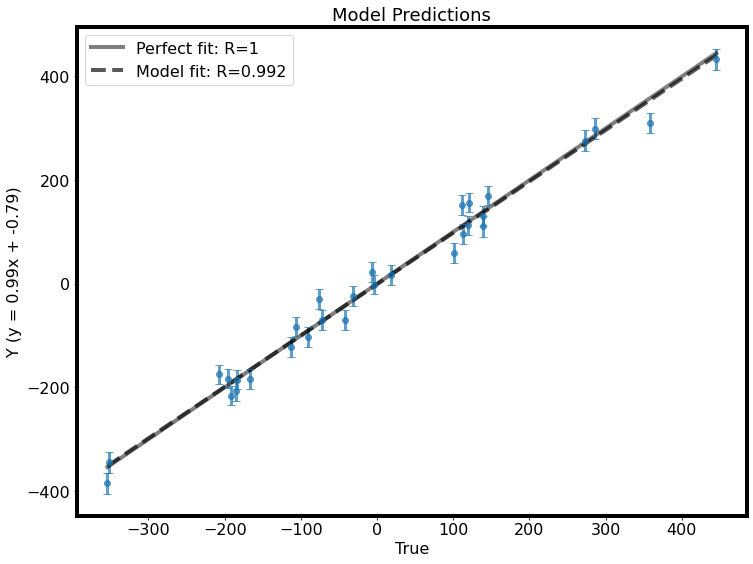

In [6]:
OneToOne = np.linspace(np.min(Y_test), np.max(Y_test), 100)
plt.plot(OneToOne, OneToOne, 'k', alpha=.5, label="Perfect fit: R=1")

lr_stats = linregress(Y_test, Y)
y_fit = OneToOne*lr_stats.slope + lr_stats.intercept

plt.plot(OneToOne, y_fit, 'k--', alpha=.65, label=r"Model fit: R={:.3f}".format(lr_stats.rvalue))
plt.errorbar(Y_test, Y, linewidth=3, capsize=4, linestyle='none', marker='o', alpha=.7, yerr = Y_stdv)

plt.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("True", fontsize=16)
plt.ylabel("Y (y = {:.2f}x + {:.2f})".format(lr_stats.slope, lr_stats.intercept), fontsize=16)
plt.title(r"Model Predictions", fontsize=18)
plt.savefig("Figures/example_1.png", dpi=100)
plt.show()

In [7]:
# import numpy as np
# import numpyro
# import numpyro.distributions as dist
# from numpyro.infer import MCMC, NUTS
# from jax import random, jit

# def model(X, y):
#     mu = numpyro.sample('mu', 
#                         dist.MultivariateNormal(loc=blr.mu, precision_matrix=blr.A))
#     L = numpyro.sample('y', dist.Normal(loc=X@mu, scale=1/blr.beta), obs=y)

# mcmc = MCMC(NUTS(model), num_warmup=500, num_samples=1000)

# rng_key = random.PRNGKey(0)
# mcmc.run(rng_key, X_train, Y_train.ravel())

# blr.mu = np.array(np.mean(mcmc.get_samples()['mu'], 0))

# Compare to MCMC 

In [8]:
blr.fit_MCMC()

warmup: 100%|█| 500/500 [00:04<00:00, 122.31it/s, 15 steps of size 3.06e-01. acc
sample: 100%|█| 1000/1000 [00:00<00:00, 1366.32it/s, 15 steps of size 3.06e-01. 


In [9]:
blr.mu[2]

2.650376660079633

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

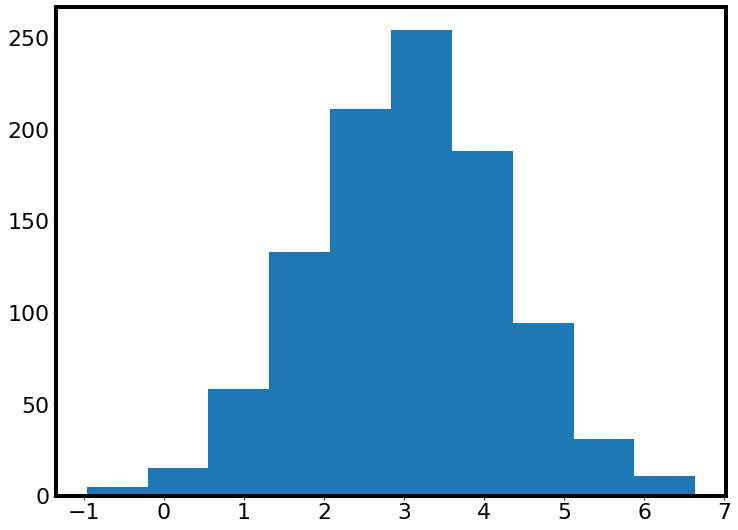

In [10]:
plt.hist(blr.posterior_params[:, 2])
plt.plot

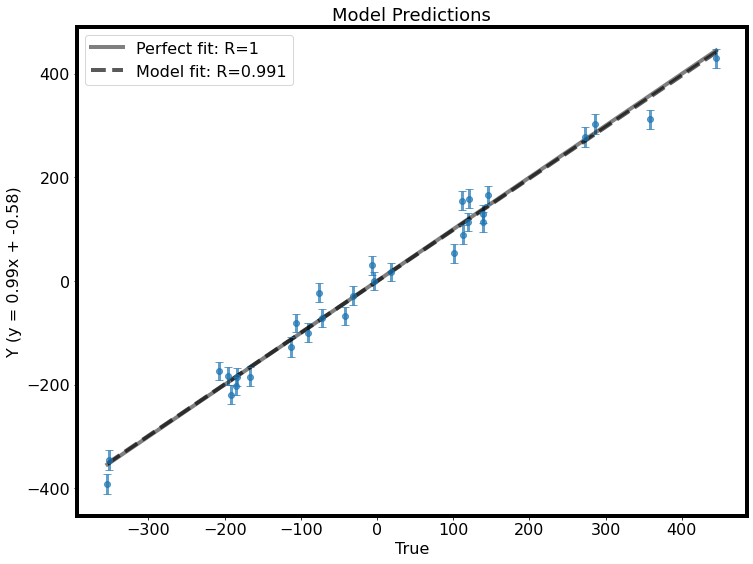

In [11]:
Y, Y_stdv = blr.predict_MCMC(X_test)

OneToOne = np.linspace(np.min(Y_test), np.max(Y_test), 100)
plt.plot(OneToOne, OneToOne, 'k', alpha=.5, label="Perfect fit: R=1")

lr_stats = linregress(Y_test, Y)
y_fit = OneToOne*lr_stats.slope + lr_stats.intercept

plt.plot(OneToOne, y_fit, 'k--', alpha=.65, label=r"Model fit: R={:.3f}".format(lr_stats.rvalue))
plt.errorbar(Y_test, Y, linewidth=3, capsize=4, linestyle='none', marker='o', alpha=.7, yerr = Y_stdv)

plt.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("True", fontsize=16)
plt.ylabel("Y (y = {:.2f}x + {:.2f})".format(lr_stats.slope, lr_stats.intercept), fontsize=16)
plt.title(r"Model Predictions", fontsize=18)
plt.savefig("Figures/example_1.png", dpi=100)
plt.show()

In [12]:
blr.mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     mu[0]      0.14      0.60      0.14     -0.78      1.17   2306.36      1.00
     mu[1]     -0.40      0.69     -0.43     -1.44      0.82   2114.30      1.00
     mu[2]      3.05      1.21      3.08      1.10      4.96   1525.97      1.00
     mu[3]      0.16      0.55      0.16     -0.77      1.06   2384.95      1.00
     mu[4]      0.01      0.50     -0.01     -0.83      0.81   2208.51      1.00
     mu[5]     -0.28      0.51     -0.30     -1.17      0.52   2249.87      1.00
     mu[6]     -0.20      0.70     -0.19     -1.41      0.90   1976.98      1.00
     mu[7]      0.04      0.19      0.04     -0.25      0.36   1954.04      1.00
     mu[8]      4.37      1.13      4.40      2.61      6.30   1819.59      1.00
     mu[9]     -0.02      0.58     -0.02     -0.95      0.95   2010.06      1.00
    mu[10]     -0.11      0.55     -0.11     -0.98      0.78   2095.63      1.00
    mu[11]      0.29      0

## Example with $\phi_i(\mathbf{x}) = [1, x_i, x_i^2, ..., x_i^5]^T$

Generate data with response that is non-linear in x

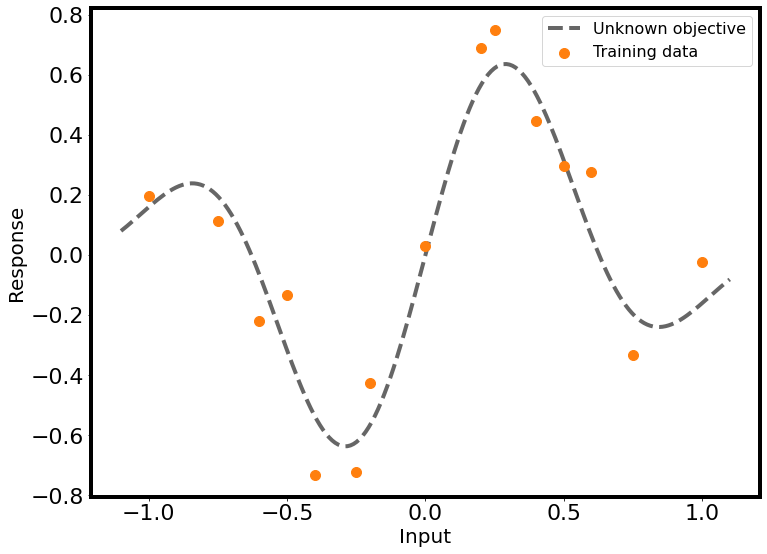

In [13]:
def f(x, noise):
    return .7*np.sin(5 * x) * (1 - np.tanh(x ** 2)) + np.random.randn() * noise/100

def generate_data(Xlist, noise=0.):
    Nsamples = len(Xlist)
    X = np.zeros([Nsamples, 1])
    Y = np.zeros(Nsamples)
    
    for i in range(Nsamples):
        X[i, :] = Xlist[i]
        # add some standard Gaussian noise to Y
        Y[i] = f(Xlist[i], noise)

    return np.vstack(X), np.vstack(Y)

# train data points
Xlist = [-1, -.75, -.6, -.5, -.4, -.25, -.2, 0, .2, .25, .4, .5, .6, .75, 1]
X_train, Y_train = generate_data(Xlist, noise=10.0)
X_test, Y_test = generate_data(list(np.linspace(-1.1, 1.1, 200)))

inds = np.argsort(np.ravel(X_train))

plt.plot(X_test.ravel(), Y_test.ravel(), 'k--', alpha=.6, label='Unknown objective', zorder=2)
plt.scatter(X_train[inds].ravel(), Y_train[inds].ravel(), c='C1', s=100, label='Training data', zorder=4)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(fontsize=16)
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

Define basis function

In [14]:
def x_basis(X):
    b = np.vstack(np.ones(X.shape[0]))
    return np.concatenate((b, X, X**2, X**3, X**4, X**5, X**6), -1)

Fit a Bayesian linear regression model and maximize evidence function

In [15]:
blr = BLR(x_basis(X_train), Y_train, alpha=0.)
blr.fit()

Evidence: -5.529
Evidence: 0.670
Evidence: 3.880
Evidence: 5.918
Evidence: 7.513
Evidence: 8.344
Evidence: 8.704
Evidence: 8.979
Evidence: 9.241
Evidence: 9.473
Evidence: 9.664
Evidence: 9.814
Evidence: 9.928
Evidence: 10.011
Evidence: 10.070
Evidence: 10.110
Evidence: 10.136
Evidence: 10.153
Evidence: 10.163
Evidence: 10.169


Make predictions on test data

In [16]:
Y, Y_stdv = blr.predict(x_basis(X_test))

Plot results

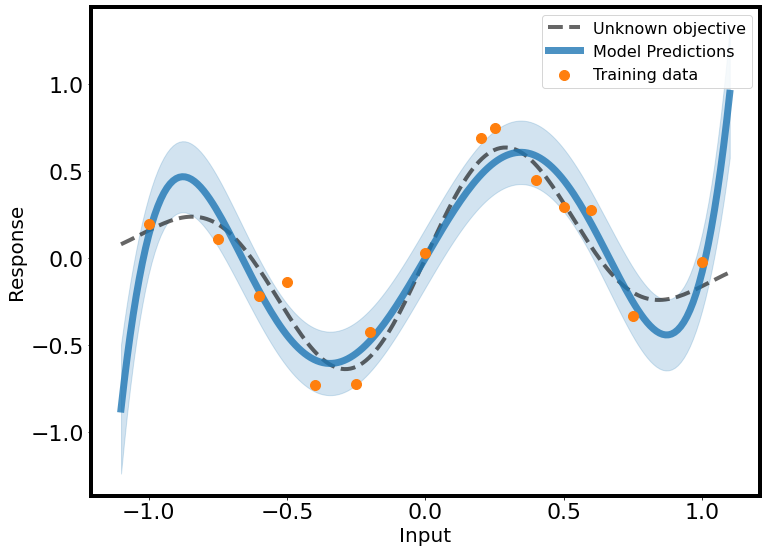

In [17]:
inds = np.argsort(np.ravel(X_train))

plt.plot(X_test.ravel(), Y_test.ravel(), 'k--', alpha=.6, label='Unknown objective', zorder=2)
plt.scatter(X_train[inds].ravel(), Y_train[inds].ravel(), c='C1', s=100, label='Training data', zorder=4)

plt.plot(X_test.ravel(), Y.ravel(), c='C0', alpha=.8, label='Model Predictions', zorder=3, linewidth=7)
unc_factor = 1. 
plt.fill_between(X_test.ravel(), Y - unc_factor*Y_stdv, Y + unc_factor*Y_stdv, 
                 color='C0', alpha=0.2, zorder=1)
#plt.title("Maximum A Posteriori")
handles, labels = plt.gca().get_legend_handles_labels()
#plt.ylim([-1.9, 1.5])
plt.legend(fontsize=16)
plt.xlabel("Input")
plt.ylabel("Response")
plt.savefig("Figures/example_2.png", dpi=100)
plt.show()

In [18]:
(1./blr.beta)**.5

0.16873627434808697

# Compare to MCMC 

In [19]:
blr.fit_MCMC()

warmup: 100%|█| 500/500 [00:02<00:00, 190.78it/s, 63 steps of size 7.72e-02. acc
sample: 100%|█| 1000/1000 [00:00<00:00, 1484.54it/s, 63 steps of size 7.72e-02. 


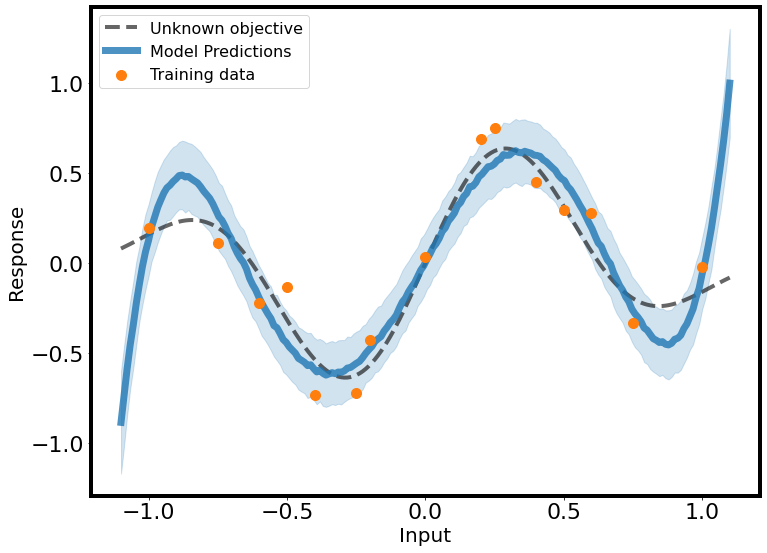

In [20]:
Y, Y_stdv = blr.predict_MCMC(x_basis(X_test))

inds = np.argsort(np.ravel(X_train))

plt.plot(X_test.ravel(), Y_test.ravel(), 'k--', alpha=.6, label='Unknown objective', zorder=2)
plt.scatter(X_train[inds].ravel(), Y_train[inds].ravel(), c='C1', s=100, label='Training data', zorder=4)

plt.plot(X_test.ravel(), Y.ravel(), c='C0', alpha=.8, label='Model Predictions', zorder=3, linewidth=7)
unc_factor = 1. 
plt.fill_between(X_test.ravel(), Y - unc_factor*Y_stdv, Y + unc_factor*Y_stdv, 
                 color='C0', alpha=0.2, zorder=1)
#plt.title("Maximum A Posteriori")
handles, labels = plt.gca().get_legend_handles_labels()
#plt.ylim([-1.9, 1.5])
plt.legend(fontsize=16)
plt.xlabel("Input")
plt.ylabel("Response")
#plt.savefig("Figures/example_2.png", dpi=100)
plt.show()

In [21]:
blr.mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     mu[0]      0.00      0.02      0.00     -0.03      0.04    801.76      1.00
     mu[1]      2.78      0.23      2.78      2.44      3.18    382.38      1.00
     mu[2]     -0.00      0.05     -0.00     -0.07      0.08    638.81      1.00
     mu[3]     -9.03      0.91     -9.02    -10.60     -7.62    362.34      1.00
     mu[4]      0.01      0.05      0.01     -0.08      0.10    504.01      1.00
     mu[5]      6.15      0.72      6.16      4.99      7.39    378.22      1.01
     mu[6]      0.02      0.06      0.02     -0.08      0.11    656.81      1.00

Number of divergences: 0


In [22]:
blr.mu

array([ 2.30097973e-03,  2.72381368e+00,  9.87356642e-04, -8.83007691e+00,
        8.31508093e-03,  6.00027148e+00,  1.42820866e-02])